In [33]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
url = './car data.csv'
df = pd.read_csv(url)
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [3]:
df.shape

(301, 9)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [5]:
df.describe

<bound method NDFrame.describe of     Car_Name  Year  Selling_Price  Present_Price  Driven_kms Fuel_Type  \
0       ritz  2014           3.35           5.59       27000    Petrol   
1        sx4  2013           4.75           9.54       43000    Diesel   
2       ciaz  2017           7.25           9.85        6900    Petrol   
3    wagon r  2011           2.85           4.15        5200    Petrol   
4      swift  2014           4.60           6.87       42450    Diesel   
..       ...   ...            ...            ...         ...       ...   
296     city  2016           9.50          11.60       33988    Diesel   
297     brio  2015           4.00           5.90       60000    Petrol   
298     city  2009           3.35          11.00       87934    Petrol   
299     city  2017          11.50          12.50        9000    Diesel   
300     brio  2016           5.30           5.90        5464    Petrol   

    Selling_type Transmission  Owner  
0         Dealer       Manual      0  

In [6]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

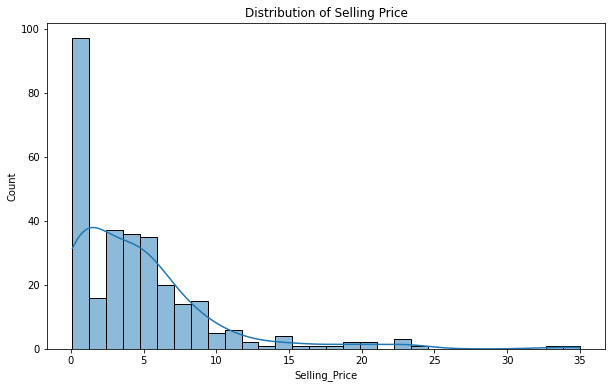

In [7]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Selling_Price'], bins=30, kde=True)
plt.title('Distribution of Selling Price')
plt.show()

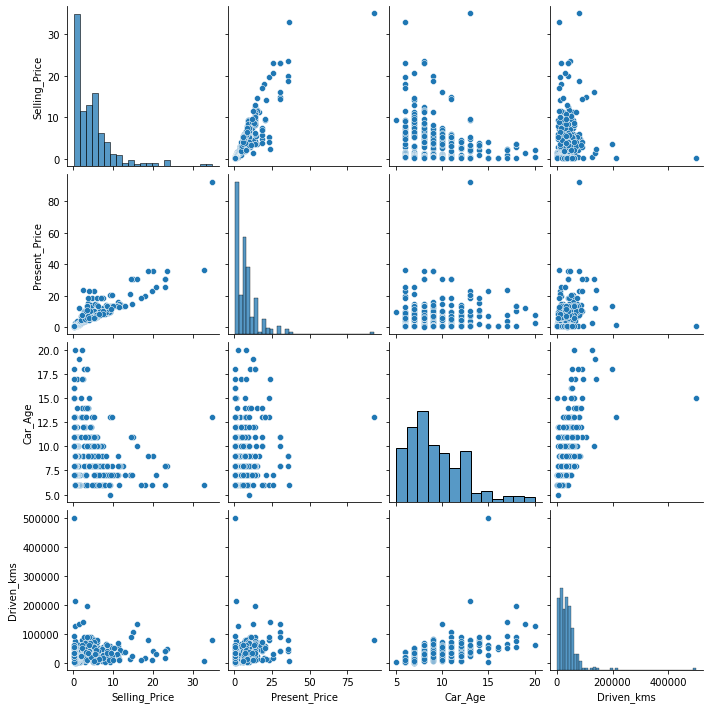

In [9]:
df['Car_Age'] = 2023 - df['Year']
sns.pairplot(df[['Selling_Price', 'Present_Price', 'Car_Age', 'Driven_kms']])
plt.show()

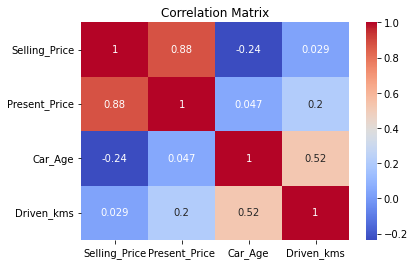

In [12]:
correlation_matrix = df[['Selling_Price', 'Present_Price', 'Car_Age', 'Driven_kms']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [10]:
df = pd.get_dummies(df, columns=['Fuel_Type', 'Selling_type', 'Transmission'], drop_first=True)

In [11]:
df = df.drop(['Car_Name', 'Year'], axis=1)

In [13]:
X = df.drop('Selling_Price', axis=1)
y = df['Selling_Price']

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [15]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [18]:
model = RandomForestRegressor()
model.fit(X_train_scaled, y_train)

RandomForestRegressor()

In [19]:
predictions = model.predict(X_test_scaled)
mae = mean_absolute_error(y_test, predictions)
print('Mean Absolute Error:',mae)

Mean Absolute Error: 1.0379557377049187


In [20]:
feature_importances = pd.Series(model.feature_importances_, index=X.columns)
feature_importances.sort_values(ascending=False, inplace=True)
feature_importances

Present_Price              0.869579
Car_Age                    0.077402
Driven_kms                 0.023434
Selling_type_Individual    0.012818
Transmission_Manual        0.009918
Fuel_Type_Diesel           0.002405
Owner                      0.002297
Fuel_Type_Petrol           0.002148
dtype: float64

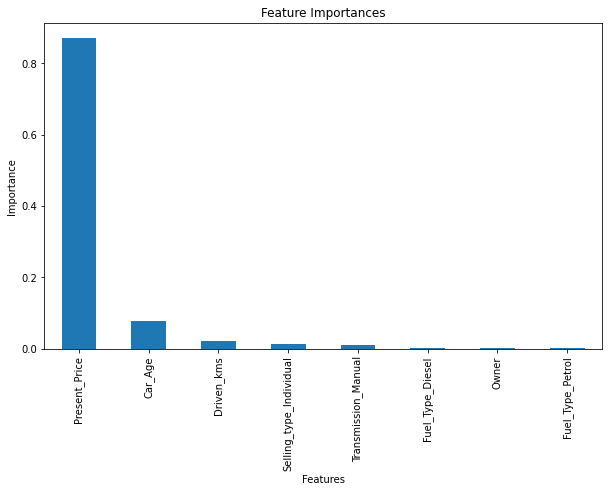

In [21]:
plt.figure(figsize=(10, 6))
feature_importances.plot(kind='bar')
plt.title('Feature Importances')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()

In [22]:
model = LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression()

In [23]:
predictions = model.predict(X_test_scaled)

In [25]:
r2 = r2_score(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)
print('R-squared: ',r2)
print('Mean Absolute Error: ',mae)

R-squared:  0.821305175689989
Mean Absolute Error:  1.7259942471493506


In [26]:
df['Price_Class'] = pd.qcut(df['Selling_Price'], q=4, labels=['Very Low', 'Low', 'Medium', 'High'])

In [27]:
X_cls = df.drop(['Selling_Price', 'Price_Class'], axis=1)
y_cls = df['Price_Class']

In [28]:
X_train_cls, X_test_cls, y_train_cls, y_test_cls = train_test_split(X_cls, y_cls, test_size=0.2, random_state=42)


In [30]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier()
classifier.fit(X_train_cls, y_train_cls)

RandomForestClassifier()

In [31]:
predictions_cls = classifier.predict(X_test_cls)

In [35]:
accuracy = accuracy_score(y_test_cls, predictions_cls)
print("Accuracy : ", accuracy*100,"%")

Accuracy :  88.52459016393442 %


In [36]:
classification_report = classification_report(y_test_cls, predictions_cls)
print(classification_report)

              precision    recall  f1-score   support

        High       0.94      0.83      0.88        18
         Low       0.84      1.00      0.91        16
      Medium       0.77      0.71      0.74        14
    Very Low       1.00      1.00      1.00        13

    accuracy                           0.89        61
   macro avg       0.89      0.89      0.88        61
weighted avg       0.89      0.89      0.88        61



In [37]:
cm = confusion_matrix(y_test_cls, predictions_cls)
cm

array([[15,  0,  3,  0],
       [ 0, 16,  0,  0],
       [ 1,  3, 10,  0],
       [ 0,  0,  0, 13]], dtype=int64)